## Adaboosting, Gradient Boosting, XGBoost

we will be working with a fake advertising data set, indicating whether or not a particular internet user clicked on an Advertisement on a company website. We will try to create a model that will predict whether or not they will click on an ad based off the features of that user.

This data set contains the following features:

* 'Daily Time Spent on Site': consumer time on site in minutes
* 'Age': cutomer age in years
* 'Area Income': Avg. Income of geographical area of consumer
* 'Daily Internet Usage': Avg. minutes a day consumer is on the internet
* 'Ad Topic Line': Headline of the advertisement
* 'City': City of consumer
* 'Male': Whether or not consumer was male
* 'Country': Country of consumer
* 'Timestamp': Time at which consumer clicked on Ad or closed window
* 'Clicked on Ad': 0 or 1 indicated clicking on Ad

## Import Libraries

In [277]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score, cross_validate
from sklearn.model_selection import GridSearchCV

from sklearn.preprocessing import MinMaxScaler

from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score, roc_auc_score
from sklearn.metrics import precision_recall_curve, plot_precision_recall_curve, plot_roc_curve, roc_auc_score

from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import plot_tree
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC

import warnings
warnings.filterwarnings("ignore")
warnings.warn("this will not show")

plt.style.use('classic')
sns.set_style("white")

In [278]:
df = pd.read_csv('advertising2.csv')
df.head()

,Daily Time Spent on Site,Age,Area Income,Daily Internet Usage,Ad Topic Line,City,Male,Country,Timestamp,Clicked on Ad
0,68.95,35,61833.90,256.09,Cloned 5thgeneration orchestration,Wrightburgh,0,Tunisia,2016-03-27 00:53:11,0
1,80.23,31,68441.85,193.77,Monitored national standardization,West Jodi,1,Nauru,2016-04-04 01:39:02,0
2,69.47,26,59785.94,236.50,Organic bottom-line service-desk,Davidton,0,San Marino,2016-03-13 20:35:42,0
3,74.15,29,54806.18,245.89,Triple-buffered reciprocal time-frame,West Terrifurt,1,Italy,2016-01-10 02:31:19,0
4,68.37,35,73889.99,225.58,Robust logistical utilization,South Manuel,0,Iceland,2016-06-03 03:36:18,0


## Exploratory Data Analysis and Visualization

In [279]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 10 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Daily Time Spent on Site  1000 non-null   float64
 1   Age                       1000 non-null   int64  
 2   Area Income               1000 non-null   float64
 3   Daily Internet Usage      1000 non-null   float64
 4   Ad Topic Line             1000 non-null   object 
 5   City                      1000 non-null   object 
 6   Male                      1000 non-null   int64  
 7   Country                   1000 non-null   object 
 8   Timestamp                 1000 non-null   object 
 9   Clicked on Ad             1000 non-null   int64  
dtypes: float64(3), int64(3), object(4)
memory usage: 78.2+ KB


In [280]:
df.describe()

,Daily Time Spent on Site,Age,Area Income,Daily Internet Usage,Male,Clicked on Ad
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.00000
mean,65.000200,36.009000,55000.000080,180.000100,0.481000,0.50000
std,15.853615,8.785562,13414.634022,43.902339,0.499889,0.50025
min,32.600000,19.000000,13996.500000,104.780000,0.000000,0.00000
25%,51.360000,29.000000,47031.802500,138.830000,0.000000,0.00000
50%,68.215000,35.000000,57012.300000,183.130000,0.000000,0.50000
75%,78.547500,42.000000,65470.635000,218.792500,1.000000,1.00000
max,91.430000,61.000000,79484.800000,269.960000,1.000000,1.00000


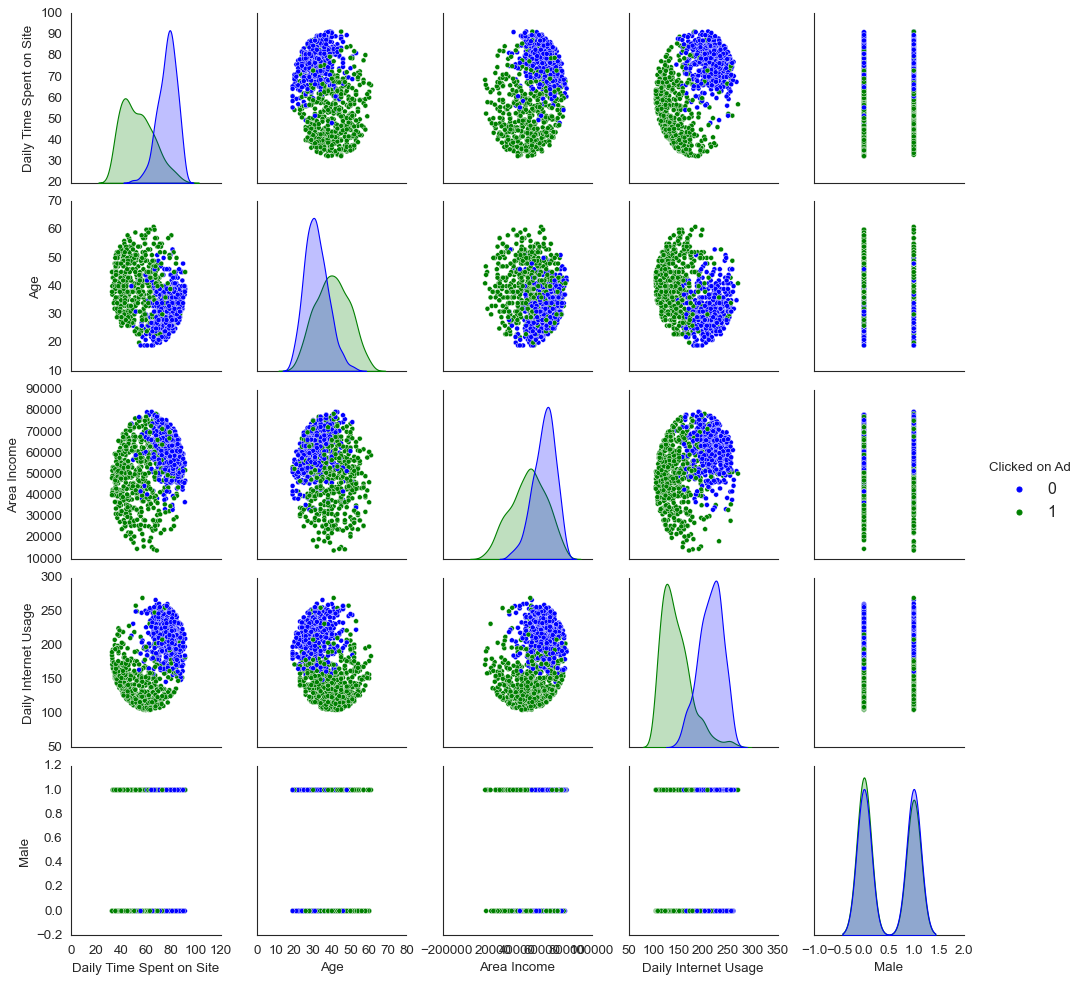

In [281]:
sns.pairplot(df, hue='Clicked on Ad')

## Train | Test Split

In [282]:
from sklearn.model_selection import train_test_split

In [283]:
X = df[['Daily Time Spent on Site', 'Age', 'Area Income','Daily Internet Usage', 'Male']]
y = df['Clicked on Ad']

In [284]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=42)

## Modelling and Model Performance

### AdaBoostClassifier

In [285]:
from sklearn.ensemble import AdaBoostClassifier
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score, roc_auc_score
from sklearn.model_selection import cross_val_score, cross_validate

In [286]:
model = AdaBoostClassifier(n_estimators=50, random_state=42)

In [287]:
model.fit(X_train,y_train)

AdaBoostClassifier(random_state=42)

In [288]:
y_pred = model.predict(X_test)

In [289]:
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test,y_pred))

[[41  3]
 [ 4 52]]
              precision    recall  f1-score   support

           0       0.91      0.93      0.92        44
           1       0.95      0.93      0.94        56

    accuracy                           0.93       100
   macro avg       0.93      0.93      0.93       100
weighted avg       0.93      0.93      0.93       100



In [290]:
y_train_pred = model.predict(X_train)

In [291]:
print(confusion_matrix(y_train, y_train_pred))
print(classification_report(y_train, y_train_pred))

[[454   2]
 [ 12 432]]
              precision    recall  f1-score   support

           0       0.97      1.00      0.98       456
           1       1.00      0.97      0.98       444

    accuracy                           0.98       900
   macro avg       0.98      0.98      0.98       900
weighted avg       0.98      0.98      0.98       900



In [292]:
from sklearn.tree import plot_tree

In [293]:
model = AdaBoostClassifier(n_estimators=3, random_state=42)

In [294]:
model.fit(X_train,y_train)

AdaBoostClassifier(n_estimators=3, random_state=42)

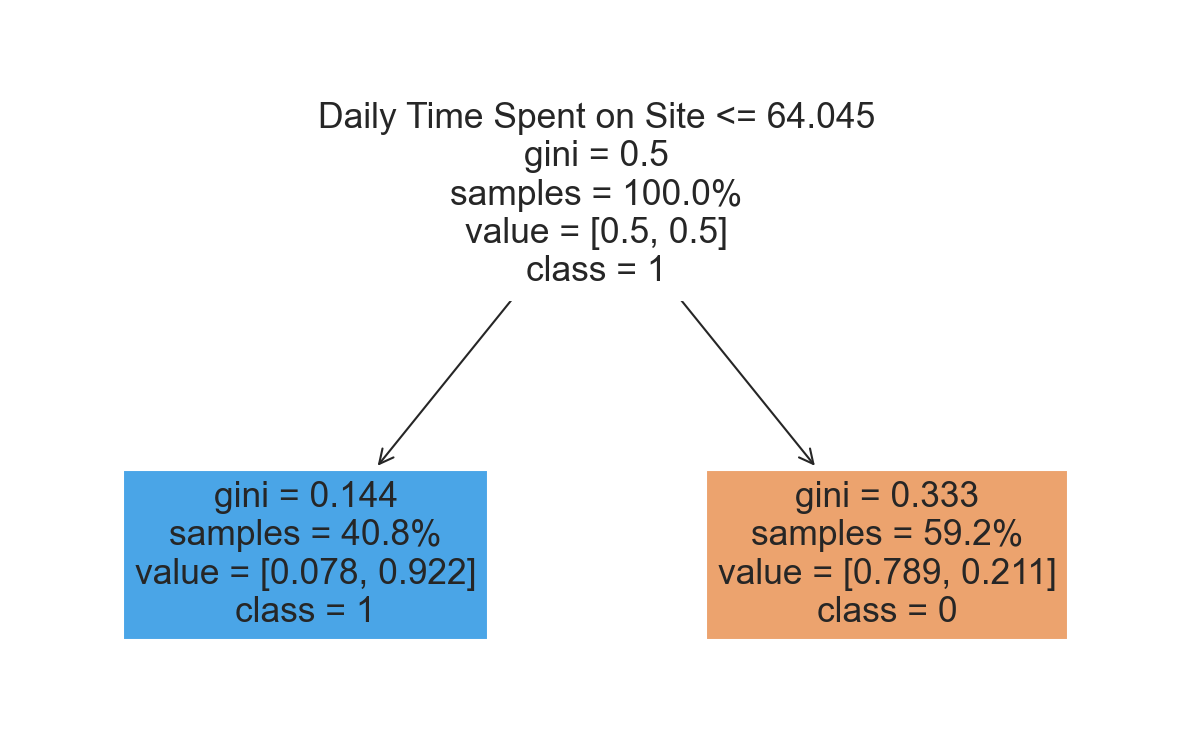

In [296]:
features = list(X.columns)
targets = df["Clicked on Ad"].astype("str")

plt.figure(figsize=(10,6),dpi=150)
plot_tree(model.estimators_[1], # 1, 0 veya 2 yapınca class ortaya çıkar, tıkladı (1) / tıklamadı (0)
          filled=True,
          feature_names=X.columns,
          class_names=targets.unique(),
          proportion=True);

In [297]:
1-1/2
# gini değeri

0.5

In [298]:
model.estimator_errors_
# Ağaçların hata oranları, sırayla 1, 2, 3 ağaçları gösterir

array([0.09666667, 0.15660636, 0.29526371])

In [299]:
1/2*np.log((1-0.09666667)/0.09666667)
# 1. ağacın ağırlığı

1.117411476360216

In [300]:
1/2*np.log((1-0.15660636)/0.15660636)
# 2. ağacın ağırlığı

0.8418492023096668

In [301]:
1/2*np.log((1-0.29526371)/0.29526371)
# 3. ağacın ağırlığı

0.43497739343711583

In [302]:
## AdaBoost Çalışma Mantığı
# 1. ağacın ağırlığı >>> 1.117411476360216 ve sonuç = 1
# 2. ağacın ağırlığı >>> 0.841849202309666 ve sonuç = 0
# 3. ağacın ağırlığı >>> 0.434977393437115 ve sonuç = 0

# 1.117411476360216 = 1.117411476360216 (2 tane 1 olsaydı bunları da toplardık)
# 0.841849202309666 + 0.43497739343711583 = 1.276826595746782
# 1.276826595746782 > 1.117411476360216 >>> sonuç = 0

## RF Çalışma Mantığı
# 1 tane 1 var, 2 tane 0 var sonuç = 0

### AdaBoostClassifier more weak learners are added.

In [303]:
error_rates = []

for n in range(1,100):
    model = AdaBoostClassifier(n_estimators=n)

    model.fit(X_train,y_train)
    preds = model.predict(X_test)
    err = 1 - f1_score(y_test, preds)
    
    error_rates.append(err)

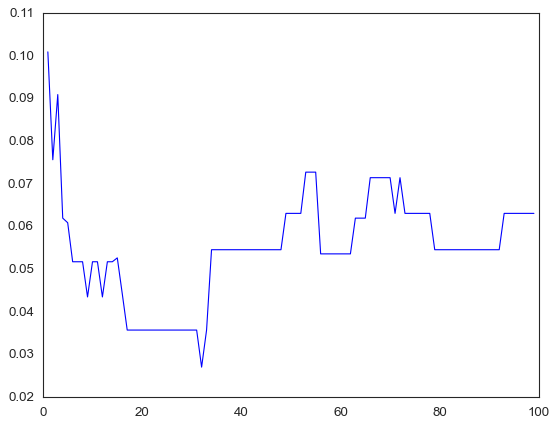

In [304]:
plt.plot(range(1,100), error_rates)

In [305]:
model.feature_importances_

array([0.24242424, 0.15151515, 0.25252525, 0.35353535, 0.        ])

In [306]:
feats = pd.DataFrame(index=X.columns, data= model.feature_importances_, columns=['Importance'])
feats

,Importance
Daily Time Spent on Site,0.242424
Age,0.151515
Area Income,0.252525
Daily Internet Usage,0.353535
Male,0.000000


In [307]:
imp_feats = feats.sort_values("Importance")

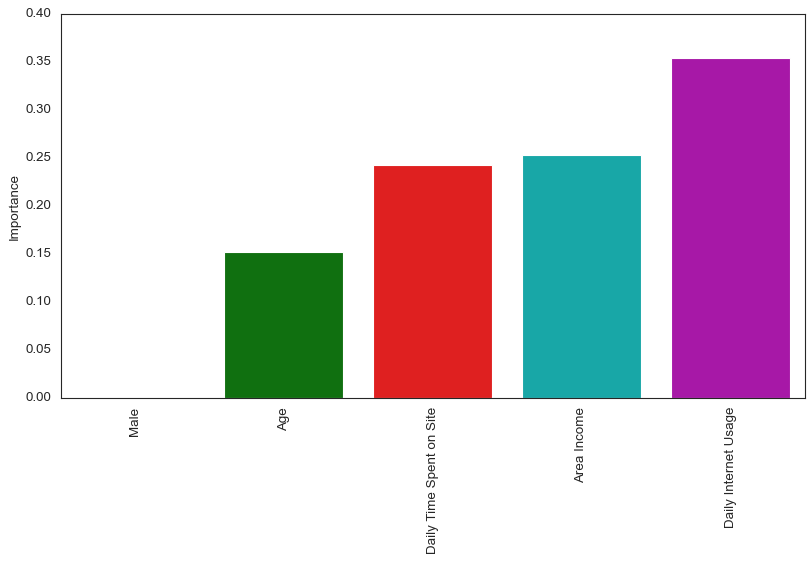

In [308]:
plt.figure(figsize=(12,6))
sns.barplot(data=imp_feats.sort_values('Importance'),
            x=imp_feats.sort_values('Importance').index,
            y='Importance')
plt.xticks(rotation=90);

### AdaBoostClassifier Gridsearch

In [309]:
from sklearn.model_selection import GridSearchCV

In [310]:
model = AdaBoostClassifier(random_state=42)

In [311]:
param_grid = {"n_estimators": [17, 20, 100, 500],
              "learning_rate": [0.01, 0.1, 0.2, 0.5, 1.0]}

In [312]:
ada_grid_model = GridSearchCV(model, param_grid, cv=5, scoring= 'f1')

In [313]:
ada_grid_model.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=AdaBoostClassifier(random_state=42),
             param_grid={'learning_rate': [0.01, 0.1, 0.2, 0.5, 1.0],
                         'n_estimators': [17, 20, 100, 500]},
             scoring='f1')

In [314]:
ada_grid_model.best_estimator_

AdaBoostClassifier(learning_rate=0.1, n_estimators=100, random_state=42)

In [315]:
ada_grid_model.best_params_

{'learning_rate': 0.1, 'n_estimators': 100}

In [316]:
y_pred = ada_grid_model.predict(X_test)

In [317]:
ada_f1 = f1_score(y_test, y_pred)
ada_recall = recall_score(y_test, y_pred)
ada_auc = roc_auc_score(y_test, y_pred)

In [318]:
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test,y_pred))

[[40  4]
 [ 3 53]]
              precision    recall  f1-score   support

           0       0.93      0.91      0.92        44
           1       0.93      0.95      0.94        56

    accuracy                           0.93       100
   macro avg       0.93      0.93      0.93       100
weighted avg       0.93      0.93      0.93       100



In [319]:
y_train_pred = ada_grid_model.predict(X_train)

In [320]:
print(confusion_matrix(y_train, y_train_pred))
print(classification_report(y_train, y_train_pred))

[[453   3]
 [ 18 426]]
              precision    recall  f1-score   support

           0       0.96      0.99      0.98       456
           1       0.99      0.96      0.98       444

    accuracy                           0.98       900
   macro avg       0.98      0.98      0.98       900
weighted avg       0.98      0.98      0.98       900



### AdaBoostClassifier ROC / AUC

In [321]:
from sklearn.metrics import precision_recall_curve, plot_precision_recall_curve, plot_roc_curve, roc_auc_score

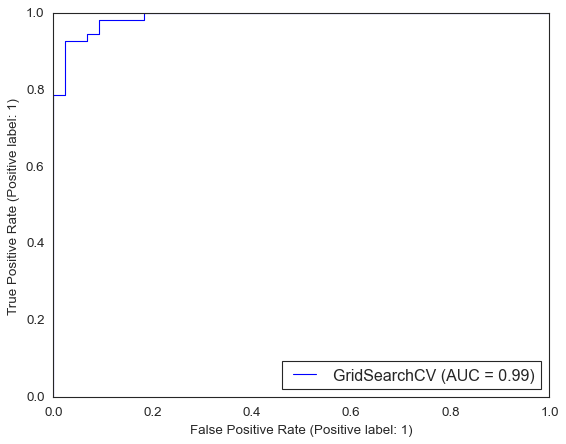

In [322]:
plot_roc_curve(ada_grid_model, X_test, y_test)

### AdaBoostClassifier Cross Validate

In [323]:
model = AdaBoostClassifier(n_estimators=100, learning_rate=0.1, random_state=42)

In [324]:
scores = cross_validate(model,
                        X_train,
                        y_train,
                        scoring = ['accuracy',
                                   'precision',
                                   'recall',
                                   'f1',
                                   'roc_auc'],
                        cv = 10)
                        
df_scores = pd.DataFrame(scores, index = range(1, 11))
df_scores

,fit_time,score_time,test_accuracy,test_precision,test_recall,test_f1,test_roc_auc
1,0.268191,0.042859,0.944444,0.934783,0.955556,0.945055,0.972346
2,0.210266,0.042934,0.977778,1.000000,0.955556,0.977273,0.980741
3,0.205446,0.042994,0.977778,1.000000,0.955556,0.977273,0.996543
4,0.269231,0.048022,0.988889,0.978261,1.000000,0.989011,1.000000
5,0.215854,0.041400,1.000000,1.000000,1.000000,1.000000,1.000000
6,0.207706,0.041331,0.955556,0.934783,0.977273,0.955556,0.992836
7,0.288619,0.053754,0.922222,0.951220,0.886364,0.917647,0.974061
8,0.240588,0.043401,0.966667,1.000000,0.931818,0.964706,0.986166
9,0.202114,0.040412,0.977778,1.000000,0.954545,0.976744,0.991107
10,0.207627,0.041274,0.966667,0.955556,0.977273,0.966292,0.990119


In [325]:
df_scores.mean()[2:]

test_accuracy     0.967778
test_precision    0.975460
test_recall       0.959394
test_f1           0.966956
test_roc_auc      0.988392
dtype: float64

### GradientBoostingClassifier

In [326]:
from sklearn.ensemble import GradientBoostingClassifier

In [327]:
model = GradientBoostingClassifier(random_state=42)

In [328]:
np.log(4/2) 

0.6931471805599453

In [329]:
(np.e**np.log(4/2))/(1+np.e**np.log(4/2))

0.6666666666666666

In [330]:
0.7 + (0.1* 0.25) + (0.1* 0.15)

0.74

In [331]:
model.fit(X_train, y_train)

GradientBoostingClassifier(random_state=42)

In [332]:
y_pred = model.predict(X_test)

In [333]:
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test,y_pred))

[[41  3]
 [ 2 54]]
              precision    recall  f1-score   support

           0       0.95      0.93      0.94        44
           1       0.95      0.96      0.96        56

    accuracy                           0.95       100
   macro avg       0.95      0.95      0.95       100
weighted avg       0.95      0.95      0.95       100



In [334]:
y_train_pred = model.predict(X_train)

In [335]:
print(confusion_matrix(y_train, y_train_pred))
print(classification_report(y_train, y_train_pred))

[[456   0]
 [  1 443]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       456
           1       1.00      1.00      1.00       444

    accuracy                           1.00       900
   macro avg       1.00      1.00      1.00       900
weighted avg       1.00      1.00      1.00       900



In [336]:
model.feature_importances_

array([2.07472544e-01, 2.71306001e-02, 5.22078111e-02, 7.12911699e-01,
       2.77345392e-04])

In [337]:
feats = pd.DataFrame(index=X.columns, data=model.feature_importances_, columns=['Importance'])
feats

,Importance
Daily Time Spent on Site,0.207473
Age,0.027131
Area Income,0.052208
Daily Internet Usage,0.712912
Male,0.000277


In [338]:
imp_feats = feats.sort_values("Importance")

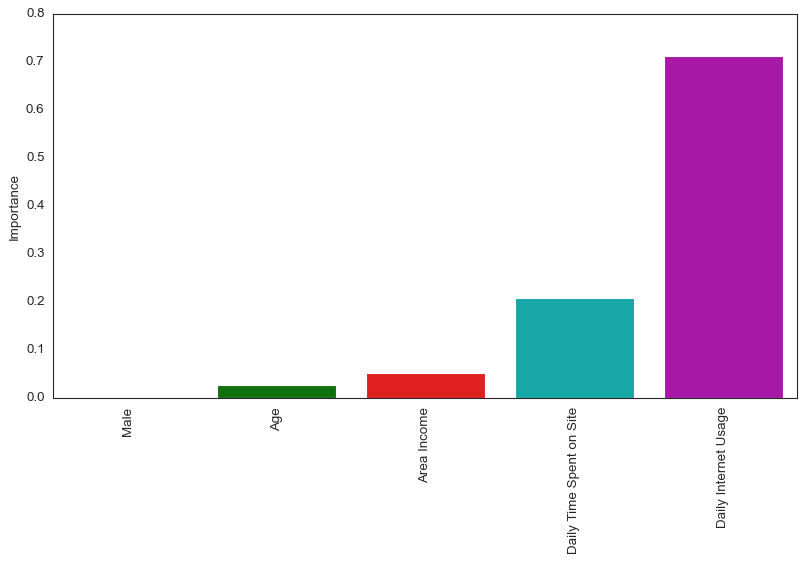

In [339]:
plt.figure(figsize=(12,6))
sns.barplot(data=imp_feats.sort_values('Importance'),
            x=imp_feats.sort_values('Importance').index,
            y='Importance')
plt.xticks(rotation=90);

### GradientBoostingClassifier Gridsearch

In [340]:
param_grid = {"n_estimators":[100, 200, 300],
              "subsample":[0.5, 1],
              "max_features" : [None, 2, 3, 4]}

# "learning_rate": [0.001, 0.01, 0.1]
# "max_depth":[3,4,5,6]

In [341]:
gb_model = GradientBoostingClassifier(random_state=42)

In [342]:
grid = GridSearchCV(gb_model,
                    param_grid,
                    scoring = "f1",
                    verbose=2,
                    n_jobs = -1)

In [343]:
grid.fit(X_train, y_train)

Fitting 5 folds for each of 24 candidates, totalling 120 fits


GridSearchCV(estimator=GradientBoostingClassifier(random_state=42), n_jobs=-1,
             param_grid={'max_features': [None, 2, 3, 4],
                         'n_estimators': [100, 200, 300],
                         'subsample': [0.5, 1]},
             scoring='f1', verbose=2)

In [344]:
grid.best_estimator_

GradientBoostingClassifier(max_features=3, random_state=42, subsample=0.5)

In [345]:
y_pred = grid.predict(X_test)

In [346]:
gb_f1 = f1_score(y_test, y_pred)
gb_recall = recall_score(y_test, y_pred)
gb_auc = roc_auc_score(y_test, y_pred)

In [347]:
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test,y_pred))

[[42  2]
 [ 2 54]]
              precision    recall  f1-score   support

           0       0.95      0.95      0.95        44
           1       0.96      0.96      0.96        56

    accuracy                           0.96       100
   macro avg       0.96      0.96      0.96       100
weighted avg       0.96      0.96      0.96       100



In [348]:
y_train_pred = grid.predict(X_train)

In [349]:
print(confusion_matrix(y_train, y_train_pred))
print(classification_report(y_train, y_train_pred))

[[456   0]
 [  4 440]]
              precision    recall  f1-score   support

           0       0.99      1.00      1.00       456
           1       1.00      0.99      1.00       444

    accuracy                           1.00       900
   macro avg       1.00      1.00      1.00       900
weighted avg       1.00      1.00      1.00       900



### GradientBoostingClassifier ROC / AUC

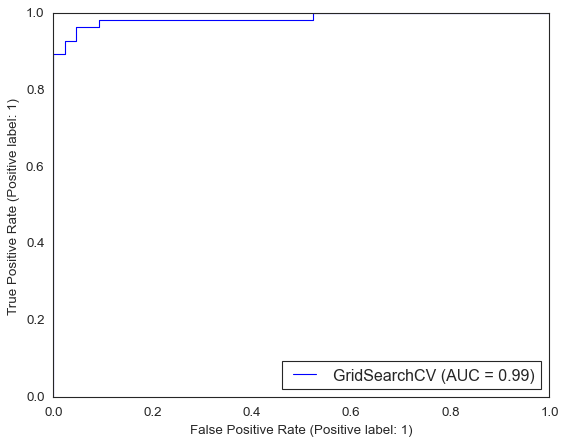

In [350]:
plot_roc_curve(grid, X_test, y_test);

### GradientBoostingClassifier Cross Validate

In [351]:
model = GradientBoostingClassifier(n_estimators=300,
                                   random_state=42,
                                   subsample=0.5, 
                                   max_features =2)

In [352]:
scores = cross_validate(model,
                        X_train,
                        y_train,
                        scoring = ['accuracy',
                                   'precision',
                                   'recall',
                                   'f1',
                                   'roc_auc'],
                        cv = 10)
                        
df_scores = pd.DataFrame(scores, index = range(1, 11))
df_scores

,fit_time,score_time,test_accuracy,test_precision,test_recall,test_f1,test_roc_auc
1,0.368892,0.009012,0.922222,0.931818,0.911111,0.921348,0.963457
2,0.310701,0.007000,0.977778,1.000000,0.955556,0.977273,0.985185
3,0.324140,0.010024,0.977778,1.000000,0.955556,0.977273,0.998025
4,0.306830,0.008996,0.955556,0.955556,0.955556,0.955556,0.998025
5,0.306698,0.008023,1.000000,1.000000,1.000000,1.000000,1.000000
6,0.309985,0.008981,0.944444,0.914894,0.977273,0.945055,0.988636
7,0.325852,0.009000,0.933333,0.975000,0.886364,0.928571,0.958498
8,0.309068,0.008000,0.966667,1.000000,0.931818,0.964706,0.993577
9,0.310135,0.009468,0.966667,0.955556,0.977273,0.966292,0.992095
10,0.306231,0.007000,0.977778,0.977273,0.977273,0.977273,0.991601


In [353]:
df_scores.mean()[2:]

test_accuracy     0.962222
test_precision    0.971010
test_recall       0.952778
test_f1           0.961335
test_roc_auc      0.986910
dtype: float64

### XGBClassifier

In [354]:
from xgboost import XGBClassifier

In [355]:
xgb = XGBClassifier(random_state=42)

In [356]:
xgb.fit(X_train, y_train)

XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric=None, gamma=0, gpu_id=-1, grow_policy='depthwise',
              importance_type=None, interaction_constraints='',
              learning_rate=0.300000012, max_bin=256, max_cat_to_onehot=4,
              max_delta_step=0, max_depth=6, max_leaves=0, min_child_weight=1,
              missing=nan, monotone_constraints='()', n_estimators=100,
              n_jobs=0, num_parallel_tree=1, predictor='auto', random_state=42,
              reg_alpha=0, reg_lambda=1, ...)

In [357]:
y_pred = xgb.predict(X_test)

In [358]:
xgb_f1 = f1_score(y_test, y_pred)
xgb_recall = recall_score(y_test, y_pred)
xgb_auc = roc_auc_score(y_test, y_pred)

In [359]:
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test,y_pred))

[[40  4]
 [ 3 53]]
              precision    recall  f1-score   support

           0       0.93      0.91      0.92        44
           1       0.93      0.95      0.94        56

    accuracy                           0.93       100
   macro avg       0.93      0.93      0.93       100
weighted avg       0.93      0.93      0.93       100



In [360]:
y_train_pred = xgb.predict(X_train)

In [361]:
print(confusion_matrix(y_train, y_train_pred))
print(classification_report(y_train, y_train_pred))

[[456   0]
 [  0 444]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       456
           1       1.00      1.00      1.00       444

    accuracy                           1.00       900
   macro avg       1.00      1.00      1.00       900
weighted avg       1.00      1.00      1.00       900



In [362]:
xgb.feature_importances_

array([0.21512516, 0.0656202 , 0.07021366, 0.6299655 , 0.01907539],
      dtype=float32)

In [363]:
feats = pd.DataFrame(index=X.columns,
                     data=xgb.feature_importances_,
                     columns=['Importance'])
feats

,Importance
Daily Time Spent on Site,0.215125
Age,0.065620
Area Income,0.070214
Daily Internet Usage,0.629965
Male,0.019075


In [364]:
imp_feats = feats.sort_values("Importance")

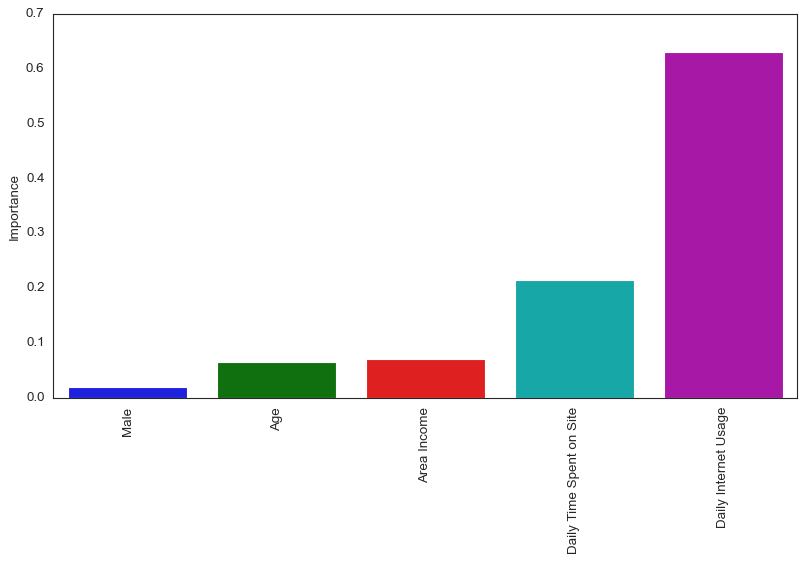

In [365]:
plt.figure(figsize=(12,6))
sns.barplot(data=imp_feats.sort_values('Importance'),
            x=imp_feats.sort_values('Importance').index,
            y='Importance')
plt.xticks(rotation=90);

### XGBClassifier Gridsearch

In [366]:
param_grid = {"n_estimators":[100, 300],
              "max_depth":[3,5,6], 
              "learning_rate": [0.1, 0.3],
              "subsample":[0.5, 1],
              "colsample_bytree":[0.5, 1]}

In [367]:
xgb_model = XGBClassifier(random_state=42)

In [368]:
xgb_grid = GridSearchCV(xgb_model,
                        param_grid,
                        scoring = "f1",
                        verbose=2,
                        n_jobs = -1)

In [369]:
xgb_grid.fit(X_train, y_train)

Fitting 5 folds for each of 48 candidates, totalling 240 fits


GridSearchCV(estimator=XGBClassifier(base_score=None, booster=None,
                                     callbacks=None, colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None,
                                     early_stopping_rounds=None,
                                     enable_categorical=False, eval_metric=None,
                                     gamma=None, gpu_id=None, grow_policy=None,
                                     importance_type=None,
                                     interaction_constraints=None,
                                     learning_rate=None, max_bin=None,
                                     max_cat_to_...
                                     max_leaves=None, min_child_weight=None,
                                     missing=nan, monotone_constraints=None,
                                     n_estimators=100, n_jobs=None,
                                     n

In [370]:
xgb_grid.best_estimator_

XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=0.5,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric=None, gamma=0, gpu_id=-1, grow_policy='depthwise',
              importance_type=None, interaction_constraints='',
              learning_rate=0.1, max_bin=256, max_cat_to_onehot=4,
              max_delta_step=0, max_depth=5, max_leaves=0, min_child_weight=1,
              missing=nan, monotone_constraints='()', n_estimators=100,
              n_jobs=0, num_parallel_tree=1, predictor='auto', random_state=42,
              reg_alpha=0, reg_lambda=1, ...)

In [371]:
xgb_grid.best_params_

{'colsample_bytree': 0.5,
 'learning_rate': 0.1,
 'max_depth': 5,
 'n_estimators': 100,
 'subsample': 0.5}

In [372]:
y_pred = xgb_grid.predict(X_test)

In [373]:
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test,y_pred))

[[40  4]
 [ 4 52]]
              precision    recall  f1-score   support

           0       0.91      0.91      0.91        44
           1       0.93      0.93      0.93        56

    accuracy                           0.92       100
   macro avg       0.92      0.92      0.92       100
weighted avg       0.92      0.92      0.92       100



In [374]:
y_train_pred = xgb_grid.predict(X_train)

In [375]:
print(confusion_matrix(y_train, y_train_pred))
print(classification_report(y_train, y_train_pred))

[[455   1]
 [ 10 434]]
              precision    recall  f1-score   support

           0       0.98      1.00      0.99       456
           1       1.00      0.98      0.99       444

    accuracy                           0.99       900
   macro avg       0.99      0.99      0.99       900
weighted avg       0.99      0.99      0.99       900



### XGBClassifier ROC / AUC

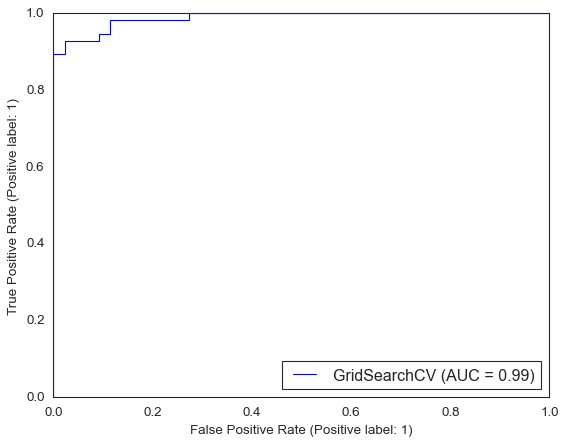

In [376]:
plot_roc_curve(xgb_grid, X_test, y_test);

### XGBClassifier Cross Validate

In [377]:
model = XGBClassifier(n_estimators=300,
                      random_state=42,
                      subsample=1,
                      learning_rate= 0.1,
                      colsample_bytree=0.5,
                      max_dept=6)

In [378]:
scores = cross_validate(model,
                        X_train,
                        y_train,
                        scoring = ['accuracy',
                                   'precision',
                                   'recall',
                                   'f1',
                                   'roc_auc'],
                        cv = 10)

df_scores = pd.DataFrame(scores, index = range(1, 11))
df_scores

[18:58:22] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.6.0/src/learner.cc:627: 
Parameters: { "max_dept" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[18:58:23] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.6.0/src/learner.cc:627: 
Parameters: { "max_dept" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[18:58:23] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.6.0/src/learner.cc:627: 
Parameters: { "max_dept" } might not be used.

  This could be a

,fit_time,score_time,test_accuracy,test_precision,test_recall,test_f1,test_roc_auc
1,0.422358,0.022932,0.944444,0.934783,0.955556,0.945055,0.976790
2,0.411909,0.022877,0.977778,1.000000,0.955556,0.977273,0.987654
3,0.409204,0.024395,0.977778,1.000000,0.955556,0.977273,0.995062
4,0.410490,0.024288,0.988889,0.978261,1.000000,0.989011,0.999506
5,0.414977,0.022942,0.988889,0.977778,1.000000,0.988764,0.999506
6,0.409052,0.023531,0.933333,0.913043,0.954545,0.933333,0.988636
7,0.393781,0.025216,0.933333,0.952381,0.909091,0.930233,0.974308
8,0.406893,0.025043,0.955556,1.000000,0.909091,0.952381,0.992589
9,0.404214,0.022906,0.966667,1.000000,0.931818,0.964706,0.991107
10,0.410639,0.025280,0.966667,0.955556,0.977273,0.966292,0.996542


In [379]:
df_scores.mean()[2:]

test_accuracy     0.963333
test_precision    0.971180
test_recall       0.954848
test_f1           0.962432
test_roc_auc      0.990170
dtype: float64

### RandomForestClassifier

In [380]:
from sklearn.ensemble import RandomForestClassifier

In [381]:
rf_model = RandomForestClassifier(random_state=42)

In [382]:
rf_model.fit(X_train,y_train)

RandomForestClassifier(random_state=42)

In [383]:
y_pred = rf_model.predict(X_test)

In [384]:
rf_f1 = f1_score(y_test, y_pred)
rf_recall = recall_score(y_test, y_pred)
rf_auc = roc_auc_score(y_test, y_pred)

In [385]:
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[41  3]
 [ 2 54]]
              precision    recall  f1-score   support

           0       0.95      0.93      0.94        44
           1       0.95      0.96      0.96        56

    accuracy                           0.95       100
   macro avg       0.95      0.95      0.95       100
weighted avg       0.95      0.95      0.95       100



### DecisionTreeClassifier

In [386]:
from sklearn.tree import DecisionTreeClassifier

In [387]:
dt_model = DecisionTreeClassifier(random_state=101)

In [388]:
dt_model.fit(X_train, y_train)

DecisionTreeClassifier(random_state=101)

In [389]:
y_pred = dt_model.predict(X_test)

In [390]:
dt_f1 = f1_score(y_test, y_pred)
dt_recall = recall_score(y_test, y_pred)
dt_auc = roc_auc_score(y_test, y_pred)

In [391]:
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[38  6]
 [ 2 54]]
              precision    recall  f1-score   support

           0       0.95      0.86      0.90        44
           1       0.90      0.96      0.93        56

    accuracy                           0.92       100
   macro avg       0.93      0.91      0.92       100
weighted avg       0.92      0.92      0.92       100



### LogisticRegression

In [392]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LogisticRegression

In [393]:
scaler = MinMaxScaler()

In [394]:
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [395]:
log_model=LogisticRegression()

In [396]:
log_model.fit(X_train_scaled, y_train)

LogisticRegression()

In [397]:
y_pred=log_model.predict(X_test_scaled)

In [398]:
log_f1 = f1_score(y_test, y_pred)
log_recall = recall_score(y_test, y_pred)
log_auc = roc_auc_score(y_test, y_pred)

In [399]:
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[43  1]
 [ 3 53]]
              precision    recall  f1-score   support

           0       0.93      0.98      0.96        44
           1       0.98      0.95      0.96        56

    accuracy                           0.96       100
   macro avg       0.96      0.96      0.96       100
weighted avg       0.96      0.96      0.96       100



### KNeighborsClassifier

In [400]:
from sklearn.neighbors import KNeighborsClassifier

In [401]:
knn_model = KNeighborsClassifier()

In [402]:
knn_model.fit(X_train_scaled, y_train)

KNeighborsClassifier()

In [403]:
y_pred = knn_model.predict(X_test_scaled)

In [404]:
knn_f1 = f1_score(y_test, y_pred)
knn_recall = recall_score(y_test, y_pred)
knn_auc = roc_auc_score(y_test, y_pred)

In [405]:
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[42  2]
 [ 2 54]]
              precision    recall  f1-score   support

           0       0.95      0.95      0.95        44
           1       0.96      0.96      0.96        56

    accuracy                           0.96       100
   macro avg       0.96      0.96      0.96       100
weighted avg       0.96      0.96      0.96       100



### SVC

In [406]:
from sklearn.svm import SVC

In [407]:
svm_model = SVC()

In [408]:
svm_model.fit(X_train_scaled, y_train)

SVC()

In [409]:
y_pred = svm_model.predict(X_test_scaled)

In [410]:
svc_f1 = f1_score(y_test, y_pred)
svc_recall = recall_score(y_test, y_pred)
svc_auc = roc_auc_score(y_test, y_pred)

In [411]:
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[42  2]
 [ 2 54]]
              precision    recall  f1-score   support

           0       0.95      0.95      0.95        44
           1       0.96      0.96      0.96        56

    accuracy                           0.96       100
   macro avg       0.96      0.96      0.96       100
weighted avg       0.96      0.96      0.96       100



### Comparing Models

In [412]:
compare = pd.DataFrame({"Model": ["Logistic Regression",
                                  "KNN",
                                  "SVM",
                                  "Decision Tree",
                                  "Random Forest",
                                  "AdaBoost",
                                  "GradientBoost",
                                  "XGBoost"],
                        "F1": [log_f1, knn_f1, svc_f1, dt_f1, rf_f1, ada_f1, gb_f1, xgb_f1],
                        "Recall": [log_recall, knn_recall, svc_recall, dt_recall, rf_recall, ada_recall, gb_recall, xgb_recall],
                        "ROC_AUC": [log_auc, knn_auc, svc_auc, dt_auc, rf_auc, ada_auc, gb_auc, xgb_auc]})

In [413]:
def labels(ax):
    for p in ax.patches:
        width = p.get_width()                        # get bar length
        ax.text(width,                               # set the text at 1 unit right of the bar
                p.get_y() + p.get_height() / 2,      # get Y coordinate + X coordinate / 2
                '{:1.3f}'.format(width),             # set variable to display, 2 decimals
                ha = 'left',                         # horizontal alignment
                va = 'center')                       # vertical alignment

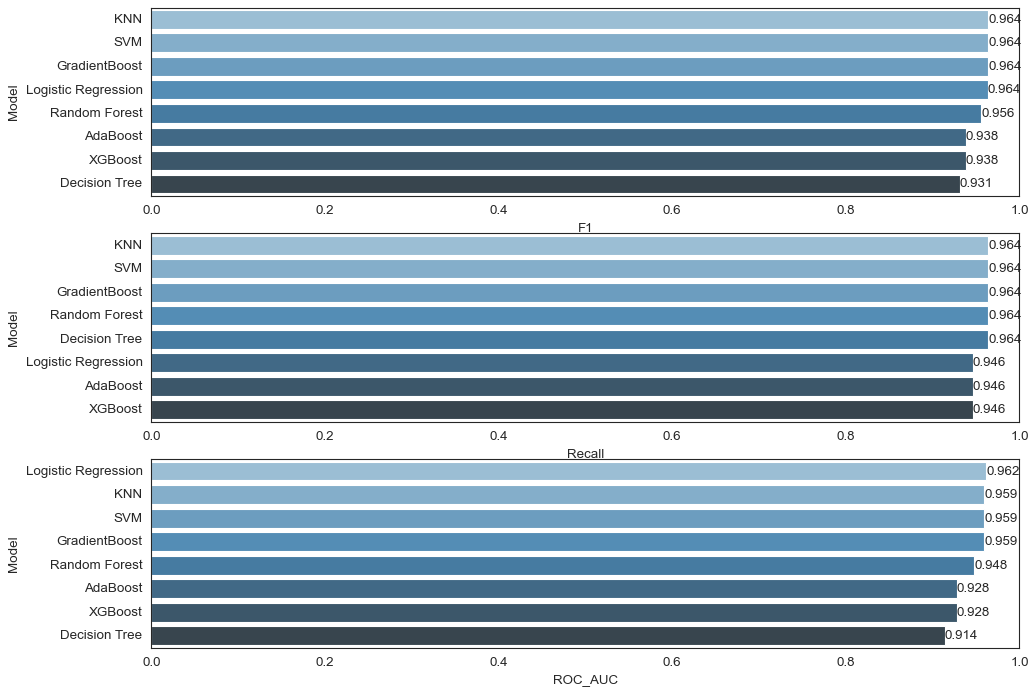

In [414]:
plt.figure(figsize=(14,10))

plt.subplot(311)
compare = compare.sort_values(by="F1", ascending=False)
ax=sns.barplot(x="F1", y="Model", data=compare, palette="Blues_d")
labels(ax)

plt.subplot(312)
compare = compare.sort_values(by="Recall", ascending=False)
ax=sns.barplot(x="Recall", y="Model", data=compare, palette="Blues_d")
labels(ax)

plt.subplot(313)
compare = compare.sort_values(by="ROC_AUC", ascending=False)
ax=sns.barplot(x="ROC_AUC", y="Model", data=compare, palette="Blues_d")
labels(ax)

plt.show()